In [1]:
#import modules
import pandas as pd
import numpy as np
import re

# Custom preprocessing function
from utils import preprocess_text


# Vectorization methods
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
import sys
import os

# Add the directory containing `utils` to the system path
sys.path.append(os.path.abspath(r"C:\Users\user\Downloads\AI Siminar\AI-Seminar-Project\Finance\utils.py"))

# Now try importing preprocess_text
from utils import preprocess_text


In [3]:
#import libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import os
print(os.getcwd())

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import logging
import pickle
import pprint
from textblob import TextBlob
import re
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Custom preprocessing function
from utils import preprocess_text


c:\Users\user\Downloads\AI Siminar\AI-Seminar-Project\Finance


In [4]:
with open(r"C:\Users\user\Downloads\motley-fool-data.pkl\motley-fool-data.pkl", "rb") as file:
    data = pickle.load(file)

data

date      exchange        q ticker  \
0       Aug 27, 2020, 9:00 p.m. ET  NASDAQ: BILI  2020-Q2   BILI   
1       Jul 30, 2020, 4:30 p.m. ET     NYSE: GFF  2020-Q3    GFF   
2       Oct 23, 2019, 5:00 p.m. ET  NASDAQ: LRCX  2020-Q1   LRCX   
3       Nov 6, 2019, 12:00 p.m. ET  NASDAQ: BBSI  2019-Q3   BBSI   
4        Aug 7, 2019, 8:30 a.m. ET  NASDAQ: CSTE  2019-Q2   CSTE   
...                            ...           ...      ...    ...   
18750    Nov 9, 2021, 1:00 p.m. ET     NYSE: SWX  2021-Q3    SWX   
18751  Nov 18, 2021, 12:00 p.m. ET    NYSE: PNNT  2021-Q4   PNNT   
18752  Feb 08, 2022, 11:00 a.m. ET     NYSE: TDG  2022-Q1    TDG   
18753   Feb 28, 2022, 4:30 p.m. ET  NASDAQ: DVAX  2021-Q4   DVAX   
18754   Aug 12, 2021, 9:00 a.m. ET   (NYSE: CIB)  2021-Q2   CIB)   

                                              transcript  
0      Prepared Remarks:\nOperator\nGood day, and wel...  
1      Prepared Remarks:\nOperator\nThank you for sta...  
2      Prepared Remarks:\nOperator\nGood day and welc...  
3      Prepared Remarks:\nOperator\nGood day, everyon...  
4      Prepared Remarks:\nOperator\nGreetings and wel...  
...                                                  ...  
18750  Prepared Remarks:\nOperator\nLadies and gentle...  
18751  Prepared Remarks:\nOperator\nGood morning, and...  
18752  Prepared Remarks:\nOperator\nThank you for sta...  
18753  Prepared Remarks:\nOperator\nGood day, ladies ...  
18754  Prepared Remarks:\nOperator\nGood morning, lad...  

[18755 rows x 5 columns]

In [5]:
transcript_list = data
transcript_list.dtypes


date          object
exchange      object
q             object
ticker        object
transcript    object
dtype: object

In [6]:
transcript_list= transcript_list.rename(columns={'ticker': 'Symbol'})
transcript_list.head(3)

date      exchange        q Symbol  \
0  Aug 27, 2020, 9:00 p.m. ET  NASDAQ: BILI  2020-Q2   BILI   
1  Jul 30, 2020, 4:30 p.m. ET     NYSE: GFF  2020-Q3    GFF   
2  Oct 23, 2019, 5:00 p.m. ET  NASDAQ: LRCX  2020-Q1   LRCX   

                                          transcript  
0  Prepared Remarks:\nOperator\nGood day, and wel...  
1  Prepared Remarks:\nOperator\nThank you for sta...  
2  Prepared Remarks:\nOperator\nGood day and welc...

In [20]:
# Define the quarters to filter
period = ['2020-Q1', '2020-Q2', '2020-Q3', '2020-Q4']

# Filter the DataFrame
transcript_list = transcript_list[transcript_list['q'].isin(period)]

print(transcript_list)


                              date      exchange        q Symbol  \
0       Aug 27, 2020, 9:00 p.m. ET  NASDAQ: BILI  2020-Q2   BILI   
1       Jul 30, 2020, 4:30 p.m. ET     NYSE: GFF  2020-Q3    GFF   
2       Oct 23, 2019, 5:00 p.m. ET  NASDAQ: LRCX  2020-Q1   LRCX   
5        Nov 4, 2020, 5:00 p.m. ET    NYSE: GDOT  2020-Q3   GDOT   
6        Aug 5, 2020, 8:30 a.m. ET     NYSE: KAR  2020-Q2    KAR   
...                            ...           ...      ...    ...   
11041   Feb 25, 2021, 2:00 p.m. ET      NYSE: KL  2020-Q4     KL   
11044   May 05, 2020, 4:30 p.m. ET  NASDAQ: CPSI  2020-Q1   CPSI   
11048    May 5, 2020, 8:00 a.m. ET       NYSE: W  2020-Q1      W   
11051   Mar 09, 2021, 8:30 a.m. ET  NASDAQ: EVLO  2020-Q4   EVLO   
18050  Feb 24, 2022, 11:00 a.m. ET  NASDAQ: PAAS  2020-Q4   PAAS   

                                              transcript  char_count  \
0      Prepared Remarks:\nOperator\nGood day, and wel...       35736   
1      Prepared Remarks:\nOperator\nTha

In [58]:
# read csv for top list
transcript_list_2020 = pd.read_csv('transcript_list_2021.csv')
transcript_list_2020

date      exchange        q Symbol  \
0     Mar 24, 2021, 11:00 a.m. ET    NYSE: EPAC  2021-Q2   EPAC   
1       Jun 9, 2021, 8:30 a.m. ET     NYSE: ABM  2021-Q2    ABM   
2      Mar 16, 2021, 4:30 p.m. ET  NASDAQ: COUP  2021-Q4   COUP   
3       Jul 1, 2021, 8:30 a.m. ET   NASDAQ: WBA  2021-Q3    WBA   
4       May 4, 2021, 8:30 a.m. ET  NASDAQ: ZBRA  2021-Q1   ZBRA   
...                           ...           ...      ...    ...   
6027    Aug 3, 2021, 8:30 a.m. ET     NYSE: FIS  2021-Q2    FIS   
6028   Oct 28, 2021, 8:15 a.m. ET     NYSE: RJF  2021-Q4    RJF   
6029   Feb 17, 2022, 5:00 p.m. ET   NASDAQ: DBX  2021-Q4    DBX   
6030   Nov 10, 2021, 5:00 p.m. ET   NASDAQ: APP  2021-Q3    APP   
6031   Aug 6, 2021, 10:00 a.m. ET  NASDAQ: ATSG  2021-Q2   ATSG   

                                             transcript  char_count  
0     Prepared Remarks:\nOperator\nLadies and gentle...       55857  
1     Prepared Remarks:\nOperator\nGreetings and wel...       55654  
2     Prepared Remarks:\nOperator\nGood day, ladies ...       62585  
3     Prepared Remarks:\nOperator\nLadies and gentle...       55722  
4     Prepared Remarks:\nOperator\nGood day, and wel...       56321  
...                                                 ...         ...  
6027  Prepared Remarks:\nOperator\nLadies and gentle...       51524  
6028  Prepared Remarks:\nOperator\nGood morning and ...       48639  
6029  Prepared Remarks:\nOperator\nGood afternoon, l...       54023  
6030  Prepared Remarks:\nOperator\nGreetings, and we...       36332  
6031  Prepared Remarks:\nOperator\nWelcome to the Se...       40996  

[6032 rows x 6 columns]

In [59]:
# reference link-https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression
# function to remove punctuation
import re,string
#('[^\w\s]','')
def strip_links(text):
    link_regex    =  re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#',""]
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\w'
C:\Users\user\AppData\Local\Temp\ipykernel_3340\3498983011.py:6: SyntaxWarning: invalid escape sequence '\w'
  link_regex    =  re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)


In [60]:
#apply function above to transcript column
transcript_list_2020['no_punctuation']=transcript_list_2020['transcript'].map(lambda x:strip_all_entities(strip_links(x)))

print(transcript_list_2020['no_punctuation'][0:6])

0    Prepared Remarks Operator Ladies and gentlemen...
1    Prepared Remarks Operator Greetings and welcom...
2    Prepared Remarks Operator Good day ladies and ...
3    Prepared Remarks Operator Ladies and gentlemen...
4    Prepared Remarks Operator Good day and welcome...
5    Prepared Remarks Operator Good afternoon and w...
Name: no_punctuation, dtype: object


In [61]:
#remove quotes and apostrophes
transcript_list['no_punctuation']=transcript_list['no_punctuation'].str.replace('[^\w\s]','')
print(transcript_list['no_punctuation'][0:6])

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\user\AppData\Local\Temp\ipykernel_3340\2350115710.py:2: SyntaxWarning: invalid escape sequence '\w'
  transcript_list['no_punctuation']=transcript_list['no_punctuation'].str.replace('[^\w\s]','')


0     Prepared Remarks Operator Good day and welcome...
1     Prepared Remarks Operator Thank you for standi...
2     Prepared Remarks Operator Good day and welcome...
5     Prepared Remarks Operator Good afternoon and w...
6     Prepared Remarks Operator Ladies and gentlemen...
10    Prepared Remarks Operator Good morning and wel...
Name: no_punctuation, dtype: object


In [62]:
#preprocess latest transcriped list with preprocess function in utils.py file

transcript_list_2020['preprocess_trans']= transcript_list_2020['no_punctuation'].apply(lambda x : ' '.join(preprocess_text(x, min_word_length=4)))
print(transcript_list_2020['preprocess_trans'][0:6])

0    prepare remark operator lady gentleman thank s...
1    prepare remark operator greet welcome industry...
2    prepare remark operator good lady gentleman we...
3    prepare remark operator lady gentleman thank s...
4    prepare remark operator good welcome first qua...
5    prepare remark operator good afternoon welcome...
Name: preprocess_trans, dtype: object


In [63]:
transcript_list_2020

date      exchange        q Symbol  \
0     Mar 24, 2021, 11:00 a.m. ET    NYSE: EPAC  2021-Q2   EPAC   
1       Jun 9, 2021, 8:30 a.m. ET     NYSE: ABM  2021-Q2    ABM   
2      Mar 16, 2021, 4:30 p.m. ET  NASDAQ: COUP  2021-Q4   COUP   
3       Jul 1, 2021, 8:30 a.m. ET   NASDAQ: WBA  2021-Q3    WBA   
4       May 4, 2021, 8:30 a.m. ET  NASDAQ: ZBRA  2021-Q1   ZBRA   
...                           ...           ...      ...    ...   
6027    Aug 3, 2021, 8:30 a.m. ET     NYSE: FIS  2021-Q2    FIS   
6028   Oct 28, 2021, 8:15 a.m. ET     NYSE: RJF  2021-Q4    RJF   
6029   Feb 17, 2022, 5:00 p.m. ET   NASDAQ: DBX  2021-Q4    DBX   
6030   Nov 10, 2021, 5:00 p.m. ET   NASDAQ: APP  2021-Q3    APP   
6031   Aug 6, 2021, 10:00 a.m. ET  NASDAQ: ATSG  2021-Q2   ATSG   

                                             transcript  char_count  \
0     Prepared Remarks:\nOperator\nLadies and gentle...       55857   
1     Prepared Remarks:\nOperator\nGreetings and wel...       55654   
2     Prepared Remarks:\nOperator\nGood day, ladies ...       62585   
3     Prepared Remarks:\nOperator\nLadies and gentle...       55722   
4     Prepared Remarks:\nOperator\nGood day, and wel...       56321   
...                                                 ...         ...   
6027  Prepared Remarks:\nOperator\nLadies and gentle...       51524   
6028  Prepared Remarks:\nOperator\nGood morning and ...       48639   
6029  Prepared Remarks:\nOperator\nGood afternoon, l...       54023   
6030  Prepared Remarks:\nOperator\nGreetings, and we...       36332   
6031  Prepared Remarks:\nOperator\nWelcome to the Se...       40996   

                                         no_punctuation  \
0     Prepared Remarks Operator Ladies and gentlemen...   
1     Prepared Remarks Operator Greetings and welcom...   
2     Prepared Remarks Operator Good day ladies and ...   
3     Prepared Remarks Operator Ladies and gentlemen...   
4     Prepared Remarks Operator Good day and welcome...   
...                                                 ...   
6027  Prepared Remarks Operator Ladies and gentlemen...   
6028  Prepared Remarks Operator Good morning and wel...   
6029  Prepared Remarks Operator Good afternoon ladie...   
6030  Prepared Remarks Operator Greetings and welcom...   
6031  Prepared Remarks Operator Welcome to the Secon...   

                                       preprocess_trans  
0     prepare remark operator lady gentleman thank s...  
1     prepare remark operator greet welcome industry...  
2     prepare remark operator good lady gentleman we...  
3     prepare remark operator lady gentleman thank s...  
4     prepare remark operator good welcome first qua...  
...                                                 ...  
6027  prepare remark operator lady gentleman thank s...  
6028  prepare remark operator good morning welcome r...  
6029  prepare remark operator good afternoon lady ge...  
6030  prepare remark operator greet welcome applovin...  
6031  prepare remark operator welcome second quarter...  

[6032 rows x 8 columns]

In [64]:
# removal words used infrequently @10% of the amount of transcripts

in_freq_words = pd.Series(' '.join(transcript_list_2020['preprocess_trans']).split()).value_counts()[-400:]
in_freq_words.head()

lobos       1
kopilot     1
tl452       1
fizy        1
gameplus    1
Name: count, dtype: int64

In [65]:
# Ensure `in_freq_words` is correctly generated as a list
in_freq_words = (
    pd.Series(' '.join(transcript_list_2020['preprocess_trans']).split())
    .value_counts()
    .iloc[-400:]
    .index.tolist()  # Convert index to a list
)


In [66]:
# list frequent words @10% of the amount of transcripts

freq_words = pd.Series(' '.join(transcript_list_2020['preprocess_trans']).split()).value_counts()[400:]
freq_words.head()

europe      10260
execute     10255
test        10152
relative    10143
small       10115
Name: count, dtype: int64

In [67]:

transcript_list_2020['clean_trans'] = transcript_list_2020['preprocess_trans'].apply(lambda x: " ".join(x for x in x.split() if x not in in_freq_words))
transcript_list_2020['clean_trans'].head()

0    prepare remark operator lady gentleman thank s...
1    prepare remark operator greet welcome industry...
2    prepare remark operator good lady gentleman we...
3    prepare remark operator lady gentleman thank s...
4    prepare remark operator good welcome first qua...
Name: clean_trans, dtype: object

In [68]:
#list to include most common words
all_words = []
for line in list(transcript_list_2020['clean_trans']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
print(all_words[10])

featured_words = list(all_words)[:1000]
print(featured_words)

group
['prepare', 'remark', 'operator', 'lady', 'gentleman', 'thank', 'stand', 'welcome', 'enerpac', 'tool', 'group', 'second', 'quarter', 'earnings', 'conference', 'call', 'operator', 'instruction', 'reminder', 'conference', 'record', 'march', 'pleasure', 'turn', 'conference', 'bobbi', 'belstner', 'director', 'investor', 'relation', 'strategy', 'please', 'ahead', 'belstner', 'bobbi', 'belstner', 'director', 'investor', 'relation', 'strategy', 'thank', 'operator', 'good', 'morning', 'thank', 'join', 'enerpac', 'tool', 'group', 'second', 'quarter', 'fiscal', 'earnings', 'conference', 'call', 'call', 'today', 'present', 'company', 'result', 'randy', 'baker', 'president', 'chief', 'executive', 'officer', 'rick', 'dillon', 'chief', 'financial', 'officer', 'jeff', 'schmaling', 'chief', 'operate', 'officer', 'barb', 'bolens', 'chief', 'strategy', 'officer', 'rasetti', 'general', 'counsel', 'bryan', 'johnson', 'chief', 'account', 'officer', 'earnings', 'release', 'slide', 'presentation', 'tod

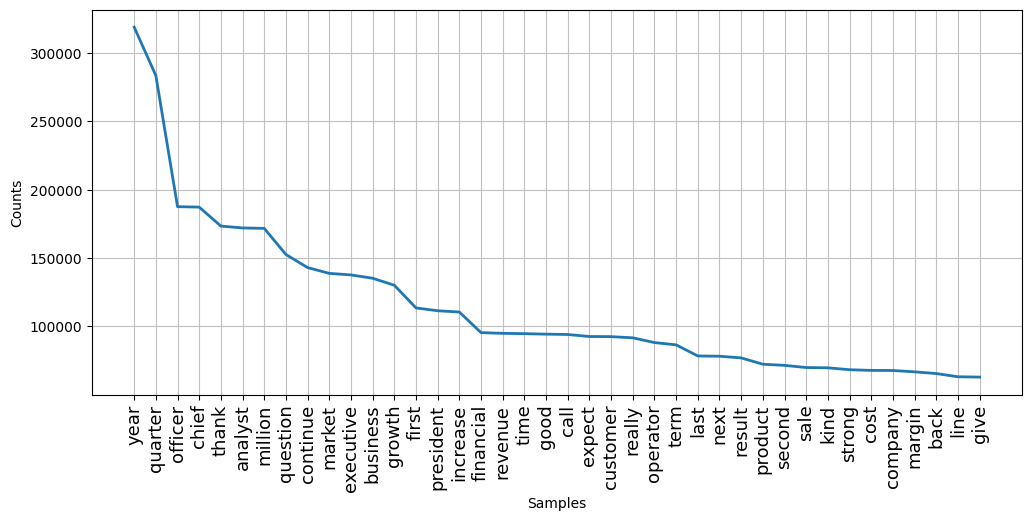

In [70]:
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
#display top word frequency of the top 40 words
fd.plot(40,cumulative=False)

# Exports graph as a png image file
plt.savefig("Fig3_Top40Words_FullTranscipt_2021.png")

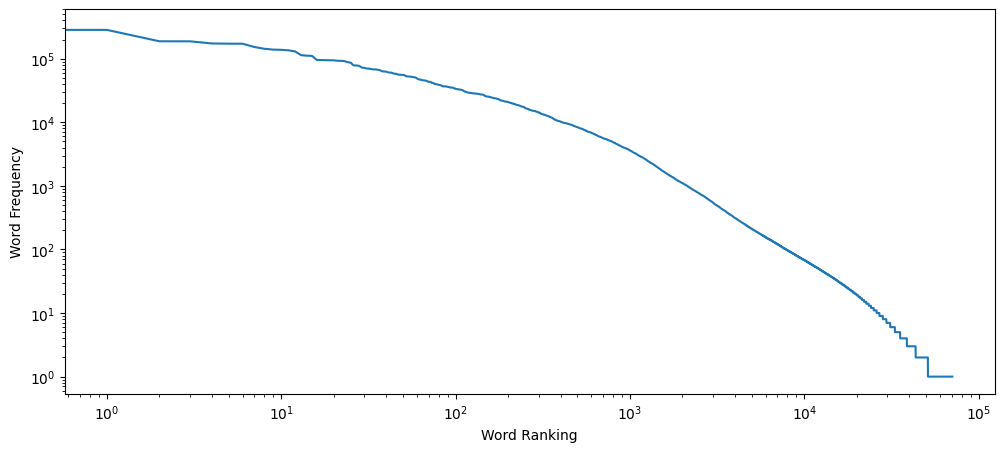

In [71]:
# log-log of all words
from collections import Counter
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Word Frequency")
plt.xlabel("Word Ranking")

# Exports graph as a png image file
plt.savefig("Fig4_WordFreqandRank_FullTranscript_2021.png")

In [57]:
#verify latest dataframe column output
transcript_list_2020.head()

date      exchange        q Symbol  \
0  Aug 27, 2020, 9:00 p.m. ET  NASDAQ: BILI  2020-Q2   BILI   
1  Jul 30, 2020, 4:30 p.m. ET     NYSE: GFF  2020-Q3    GFF   
2  Oct 23, 2019, 5:00 p.m. ET  NASDAQ: LRCX  2020-Q1   LRCX   
3   Nov 4, 2020, 5:00 p.m. ET    NYSE: GDOT  2020-Q3   GDOT   
4   Aug 5, 2020, 8:30 a.m. ET     NYSE: KAR  2020-Q2    KAR   

                                          transcript  char_count  \
0  Prepared Remarks:\nOperator\nGood day, and wel...       35736   
1  Prepared Remarks:\nOperator\nThank you for sta...       29761   
2  Prepared Remarks:\nOperator\nGood day and welc...       53094   
3  Prepared Remarks:\nOperator\nGood afternoon, a...       49767   
4  Prepared Remarks:\nOperator\nLadies and gentle...       63292   

                                      no_punctuation  \
0  Prepared Remarks Operator Good day and welcome...   
1  Prepared Remarks Operator Thank you for standi...   
2  Prepared Remarks Operator Good day and welcome...   
3  Prepared Remarks Operator Good afternoon and w...   
4  Prepared Remarks Operator Ladies and gentlemen...   

                                    preprocess_trans  \
0  prepare remark operator good welcome bilibili ...   
1  prepare remark operator thank stand conference...   
2  prepare remark operator good welcome september...   
3  prepare remark operator good afternoon welcome...   
4  prepare remark operator lady gentleman thank s...   

                                         clean_trans  
0  prepare remark operator good welcome bilibili ...  
1  prepare remark operator thank stand conference...  
2  prepare remark operator good welcome september...  
3  prepare remark operator good afternoon welcome...  
4  prepare remark operator lady gentleman thank s...

In [73]:
#verify latest dataframe column output
transcript_list_2020.head()

date      exchange        q Symbol  \
0  Mar 24, 2021, 11:00 a.m. ET    NYSE: EPAC  2021-Q2   EPAC   
1    Jun 9, 2021, 8:30 a.m. ET     NYSE: ABM  2021-Q2    ABM   
2   Mar 16, 2021, 4:30 p.m. ET  NASDAQ: COUP  2021-Q4   COUP   
3    Jul 1, 2021, 8:30 a.m. ET   NASDAQ: WBA  2021-Q3    WBA   
4    May 4, 2021, 8:30 a.m. ET  NASDAQ: ZBRA  2021-Q1   ZBRA   

                                          transcript  char_count  \
0  Prepared Remarks:\nOperator\nLadies and gentle...       55857   
1  Prepared Remarks:\nOperator\nGreetings and wel...       55654   
2  Prepared Remarks:\nOperator\nGood day, ladies ...       62585   
3  Prepared Remarks:\nOperator\nLadies and gentle...       55722   
4  Prepared Remarks:\nOperator\nGood day, and wel...       56321   

                                      no_punctuation  \
0  Prepared Remarks Operator Ladies and gentlemen...   
1  Prepared Remarks Operator Greetings and welcom...   
2  Prepared Remarks Operator Good day ladies and ...   
3  Prepared Remarks Operator Ladies and gentlemen...   
4  Prepared Remarks Operator Good day and welcome...   

                                    preprocess_trans  \
0  prepare remark operator lady gentleman thank s...   
1  prepare remark operator greet welcome industry...   
2  prepare remark operator good lady gentleman we...   
3  prepare remark operator lady gentleman thank s...   
4  prepare remark operator good welcome first qua...   

                                         clean_trans  
0  prepare remark operator lady gentleman thank s...  
1  prepare remark operator greet welcome industry...  
2  prepare remark operator good lady gentleman we...  
3  prepare remark operator lady gentleman thank s...  
4  prepare remark operator good welcome first qua...

In [74]:
#remove stop words
from sklearn.feature_extraction import text #import package

skl_stopwords = text.ENGLISH_STOP_WORDS
#print(skl_stopwords)

from nltk.corpus import stopwords # for excluding the stopwords

#creating an object using the default nltk stopwords
nltk_stopwords = stopwords.words("english")
print(nltk_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [75]:
#remove stop words from latest cleaned transcript
transcript_list_2020['clean_trans2']=transcript_list_2020['clean_trans'].apply(lambda x: " ".join(x for x in x.split() if x not in nltk_stopwords))
transcript_list_2020['clean_trans2'][:6]

0    prepare remark operator lady gentleman thank s...
1    prepare remark operator greet welcome industry...
2    prepare remark operator good lady gentleman we...
3    prepare remark operator lady gentleman thank s...
4    prepare remark operator good welcome first qua...
5    prepare remark operator good afternoon welcome...
Name: clean_trans2, dtype: object

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

# Now eliminaing customized stop words
count_vect = CountVectorizer(binary=False, stop_words = nltk_stopwords) 

count_vect_custom_stopwords = count_vect.fit_transform(transcript_list_2020['clean_trans2'])
print(count_vect_custom_stopwords.shape)
print(count_vect_custom_stopwords)

# Use `get_feature_names_out` to get feature names
names = count_vect.get_feature_names_out()

count = np.sum(count_vect_custom_stopwords.toarray(), axis = 0) 
count2 = count.tolist() 



(6032, 70742)
  (0, 49353)	3
  (0, 52707)	5
  (0, 44996)	17
  (0, 34854)	1
  (0, 25403)	1
  (0, 62950)	25
  (0, 59936)	2
  (0, 68775)	1
  (0, 20420)	13
  (0, 63760)	15
  (0, 26786)	3
  (0, 56579)	25
  (0, 50706)	89
  (0, 19249)	7
  (0, 13667)	4
  (0, 9765)	22
  (0, 31300)	3
  (0, 52750)	2
  (0, 51885)	3
  (0, 37734)	6
  (0, 48279)	1
  (0, 64972)	14
  (0, 7557)	4
  (0, 6325)	4
  (0, 17705)	3
  :	:
  (6031, 46817)	3
  (6031, 607)	2
  (6031, 66973)	1
  (6031, 44720)	1
  (6031, 39639)	1
  (6031, 14120)	1
  (6031, 31837)	1
  (6031, 53611)	1
  (6031, 17303)	1
  (6031, 55283)	1
  (6031, 12704)	1
  (6031, 60213)	1
  (6031, 37996)	1
  (6031, 24726)	7
  (6031, 3669)	1
  (6031, 6453)	8
  (6031, 1080)	5
  (6031, 601)	3
  (6031, 4744)	1
  (6031, 4743)	5
  (6031, 14368)	20
  (6031, 50829)	21
  (6031, 2778)	1
  (6031, 47068)	1
  (6031, 501)	1


In [79]:
#dataframe of output
count_df = pd.DataFrame(count2, index = names, columns = ['Word Count']) 
#  top 20 features by count
count_df.sort_values(['Word Count'], ascending = False)[:20]


Word Count
year           319080
quarter        283611
officer        187660
chief          187333
thank          173441
analyst        172087
million        171774
question       152658
continue       143076
market         138837
executive      137696
business       135272
growth         130151
first          113552
president      111486
increase       110547
financial       95483
revenue         94957
time            94717
good            94354

In [80]:
transcript_list_2020.head(5)

date      exchange        q Symbol  \
0  Mar 24, 2021, 11:00 a.m. ET    NYSE: EPAC  2021-Q2   EPAC   
1    Jun 9, 2021, 8:30 a.m. ET     NYSE: ABM  2021-Q2    ABM   
2   Mar 16, 2021, 4:30 p.m. ET  NASDAQ: COUP  2021-Q4   COUP   
3    Jul 1, 2021, 8:30 a.m. ET   NASDAQ: WBA  2021-Q3    WBA   
4    May 4, 2021, 8:30 a.m. ET  NASDAQ: ZBRA  2021-Q1   ZBRA   

                                          transcript  char_count  \
0  Prepared Remarks:\nOperator\nLadies and gentle...       55857   
1  Prepared Remarks:\nOperator\nGreetings and wel...       55654   
2  Prepared Remarks:\nOperator\nGood day, ladies ...       62585   
3  Prepared Remarks:\nOperator\nLadies and gentle...       55722   
4  Prepared Remarks:\nOperator\nGood day, and wel...       56321   

                                      no_punctuation  \
0  Prepared Remarks Operator Ladies and gentlemen...   
1  Prepared Remarks Operator Greetings and welcom...   
2  Prepared Remarks Operator Good day ladies and ...   
3  Prepared Remarks Operator Ladies and gentlemen...   
4  Prepared Remarks Operator Good day and welcome...   

                                    preprocess_trans  \
0  prepare remark operator lady gentleman thank s...   
1  prepare remark operator greet welcome industry...   
2  prepare remark operator good lady gentleman we...   
3  prepare remark operator lady gentleman thank s...   
4  prepare remark operator good welcome first qua...   

                                         clean_trans  \
0  prepare remark operator lady gentleman thank s...   
1  prepare remark operator greet welcome industry...   
2  prepare remark operator good lady gentleman we...   
3  prepare remark operator lady gentleman thank s...   
4  prepare remark operator good welcome first qua...   

                                        clean_trans2  
0  prepare remark operator lady gentleman thank s...  
1  prepare remark operator greet welcome industry...  
2  prepare remark operator good lady gentleman we...  
3  prepare remark operator lady gentleman thank s...  
4  prepare remark operator good welcome first qua...

In [81]:
#VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in 
#social media and generalizes to multiple domains. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally 
#labelled according to their semantic orientation as either positive or negative.http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf
#VADER does not require training data and is constructed from a generalizable, valence-based, human curated standard sentiment lexicon

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def getSentimentScores(text):
    score=SentimentIntensityAnalyzer()
    #dictionary
    sentiment_dict=score.polarity_scores(text)
    print(sentiment_dict)
    print(f'positive sentiment: {sentiment_dict["pos"]*100}, %positive')
    print(f'neutral sentiment: {sentiment_dict["neu"]*100}, %neutral')
    print(f'negative sentiment: {sentiment_dict["neg"]*100}, %negative')
    #decide sentiment 
    if sentiment_dict['compound'] > 0.075:
        print ('Positive')
    elif sentiment_dict['compound'] < 0.025:
        print ('Negative')
    else: 
        print ('Neutral')
    return sentiment_dict

In [83]:
###modified 2
transcript_list_2020['sentiment_compound']=transcript_list_2020['clean_trans2'].apply(lambda x: getSentimentScores(x)['compound'])

{'neg': 0.037, 'neu': 0.735, 'pos': 0.227, 'compound': 1.0}
positive sentiment: 22.7, %positive
neutral sentiment: 73.5, %neutral
negative sentiment: 3.6999999999999997, %negative
Positive
{'neg': 0.021, 'neu': 0.71, 'pos': 0.269, 'compound': 1.0}
positive sentiment: 26.900000000000002, %positive
neutral sentiment: 71.0, %neutral
negative sentiment: 2.1, %negative
Positive
{'neg': 0.033, 'neu': 0.703, 'pos': 0.265, 'compound': 1.0}
positive sentiment: 26.5, %positive
neutral sentiment: 70.3, %neutral
negative sentiment: 3.3000000000000003, %negative
Positive
{'neg': 0.031, 'neu': 0.708, 'pos': 0.261, 'compound': 1.0}
positive sentiment: 26.1, %positive
neutral sentiment: 70.8, %neutral
negative sentiment: 3.1, %negative
Positive
{'neg': 0.033, 'neu': 0.685, 'pos': 0.282, 'compound': 1.0}
positive sentiment: 28.199999999999996, %positive
neutral sentiment: 68.5, %neutral
negative sentiment: 3.3000000000000003, %negative
Positive
{'neg': 0.022, 'neu': 0.747, 'pos': 0.231, 'compound': 1.0

In [84]:
###modified 2
transcript_list_2020['sentiment_pos']=transcript_list_2020['clean_trans2'].apply(lambda x: getSentimentScores(x)['pos'])

{'neg': 0.037, 'neu': 0.735, 'pos': 0.227, 'compound': 1.0}
positive sentiment: 22.7, %positive
neutral sentiment: 73.5, %neutral
negative sentiment: 3.6999999999999997, %negative
Positive
{'neg': 0.021, 'neu': 0.71, 'pos': 0.269, 'compound': 1.0}
positive sentiment: 26.900000000000002, %positive
neutral sentiment: 71.0, %neutral
negative sentiment: 2.1, %negative
Positive
{'neg': 0.033, 'neu': 0.703, 'pos': 0.265, 'compound': 1.0}
positive sentiment: 26.5, %positive
neutral sentiment: 70.3, %neutral
negative sentiment: 3.3000000000000003, %negative
Positive
{'neg': 0.031, 'neu': 0.708, 'pos': 0.261, 'compound': 1.0}
positive sentiment: 26.1, %positive
neutral sentiment: 70.8, %neutral
negative sentiment: 3.1, %negative
Positive
{'neg': 0.033, 'neu': 0.685, 'pos': 0.282, 'compound': 1.0}
positive sentiment: 28.199999999999996, %positive
neutral sentiment: 68.5, %neutral
negative sentiment: 3.3000000000000003, %negative
Positive
{'neg': 0.022, 'neu': 0.747, 'pos': 0.231, 'compound': 1.0

In [85]:
###modified 2
transcript_list_2020['sentiment_neg']=transcript_list_2020['clean_trans2'].apply(lambda x: getSentimentScores(x)['neg'])

{'neg': 0.037, 'neu': 0.735, 'pos': 0.227, 'compound': 1.0}
positive sentiment: 22.7, %positive
neutral sentiment: 73.5, %neutral
negative sentiment: 3.6999999999999997, %negative
Positive
{'neg': 0.021, 'neu': 0.71, 'pos': 0.269, 'compound': 1.0}
positive sentiment: 26.900000000000002, %positive
neutral sentiment: 71.0, %neutral
negative sentiment: 2.1, %negative
Positive
{'neg': 0.033, 'neu': 0.703, 'pos': 0.265, 'compound': 1.0}
positive sentiment: 26.5, %positive
neutral sentiment: 70.3, %neutral
negative sentiment: 3.3000000000000003, %negative
Positive
{'neg': 0.031, 'neu': 0.708, 'pos': 0.261, 'compound': 1.0}
positive sentiment: 26.1, %positive
neutral sentiment: 70.8, %neutral
negative sentiment: 3.1, %negative
Positive
{'neg': 0.033, 'neu': 0.685, 'pos': 0.282, 'compound': 1.0}
positive sentiment: 28.199999999999996, %positive
neutral sentiment: 68.5, %neutral
negative sentiment: 3.3000000000000003, %negative
Positive
{'neg': 0.022, 'neu': 0.747, 'pos': 0.231, 'compound': 1.0

In [86]:

###modified 2
transcript_list_2020['sentiment_neu']=transcript_list_2020['clean_trans2'].apply(lambda x: getSentimentScores(x)['neu'])

{'neg': 0.037, 'neu': 0.735, 'pos': 0.227, 'compound': 1.0}
positive sentiment: 22.7, %positive
neutral sentiment: 73.5, %neutral
negative sentiment: 3.6999999999999997, %negative
Positive
{'neg': 0.021, 'neu': 0.71, 'pos': 0.269, 'compound': 1.0}
positive sentiment: 26.900000000000002, %positive
neutral sentiment: 71.0, %neutral
negative sentiment: 2.1, %negative
Positive
{'neg': 0.033, 'neu': 0.703, 'pos': 0.265, 'compound': 1.0}
positive sentiment: 26.5, %positive
neutral sentiment: 70.3, %neutral
negative sentiment: 3.3000000000000003, %negative
Positive
{'neg': 0.031, 'neu': 0.708, 'pos': 0.261, 'compound': 1.0}
positive sentiment: 26.1, %positive
neutral sentiment: 70.8, %neutral
negative sentiment: 3.1, %negative
Positive
{'neg': 0.033, 'neu': 0.685, 'pos': 0.282, 'compound': 1.0}
positive sentiment: 28.199999999999996, %positive
neutral sentiment: 68.5, %neutral
negative sentiment: 3.3000000000000003, %negative
Positive
{'neg': 0.022, 'neu': 0.747, 'pos': 0.231, 'compound': 1.0

In [87]:
transcript_list_2020.head(3)


date      exchange        q Symbol  \
0  Mar 24, 2021, 11:00 a.m. ET    NYSE: EPAC  2021-Q2   EPAC   
1    Jun 9, 2021, 8:30 a.m. ET     NYSE: ABM  2021-Q2    ABM   
2   Mar 16, 2021, 4:30 p.m. ET  NASDAQ: COUP  2021-Q4   COUP   

                                          transcript  char_count  \
0  Prepared Remarks:\nOperator\nLadies and gentle...       55857   
1  Prepared Remarks:\nOperator\nGreetings and wel...       55654   
2  Prepared Remarks:\nOperator\nGood day, ladies ...       62585   

                                      no_punctuation  \
0  Prepared Remarks Operator Ladies and gentlemen...   
1  Prepared Remarks Operator Greetings and welcom...   
2  Prepared Remarks Operator Good day ladies and ...   

                                    preprocess_trans  \
0  prepare remark operator lady gentleman thank s...   
1  prepare remark operator greet welcome industry...   
2  prepare remark operator good lady gentleman we...   

                                         clean_trans  \
0  prepare remark operator lady gentleman thank s...   
1  prepare remark operator greet welcome industry...   
2  prepare remark operator good lady gentleman we...   

                                        clean_trans2  sentiment_compound  \
0  prepare remark operator lady gentleman thank s...                 1.0   
1  prepare remark operator greet welcome industry...                 1.0   
2  prepare remark operator good lady gentleman we...                 1.0   

   sentiment_pos  sentiment_neg  sentiment_neu  
0          0.227          0.037          0.735  
1          0.269          0.021          0.710  
2          0.265          0.033          0.703

In [91]:
transcript_list_2020.columns

Index(['date', 'exchange', 'q', 'Symbol', 'transcript', 'char_count',
       'no_punctuation', 'preprocess_trans', 'clean_trans', 'clean_trans2',
       'sentiment_compound', 'sentiment_pos', 'sentiment_neg',
       'sentiment_neu'],
      dtype='object')

In [ ]:
transcript_list_2020.columns

In [106]:
transcribed_list_sent = transcript_list_2020.drop(
    ['transcript', 'char_count', 
     'no_punctuation', 'preprocess_trans', 'clean_trans', 
     'sentiment_compound'], 
    axis=1  # Explicitly specify this is for columns
)

transcribed_list_sent.head(3)


date      exchange        q Symbol  \
0  Mar 24, 2021, 11:00 a.m. ET    NYSE: EPAC  2021-Q2   EPAC   
1    Jun 9, 2021, 8:30 a.m. ET     NYSE: ABM  2021-Q2    ABM   
2   Mar 16, 2021, 4:30 p.m. ET  NASDAQ: COUP  2021-Q4   COUP   

                                        clean_trans2  sentiment_pos  \
0  prepare remark operator lady gentleman thank s...          0.227   
1  prepare remark operator greet welcome industry...          0.269   
2  prepare remark operator good lady gentleman we...          0.265   

   sentiment_neg  sentiment_neu  
0          0.037          0.735  
1          0.021          0.710  
2          0.033          0.703

In [107]:
transcribed_list_sent.to_csv('full_transcript_sents_2021.csv')

In [108]:
full_transcript_sents=pd.read_csv('full_transcript_sents_2021.csv')

In [109]:
transcript_list_2020[['sentiment_neu',
       'sentiment_neg', 'sentiment_pos']].describe()

sentiment_neu  sentiment_neg  sentiment_pos
count    6032.000000    6032.000000    6032.000000
mean        0.721451       0.033118       0.245422
std         0.026432       0.012514       0.028901
min         0.622000       0.003000       0.138000
25%         0.703000       0.024000       0.226000
50%         0.720000       0.031000       0.246000
75%         0.739000       0.039000       0.265000
max         0.819000       0.115000       0.358000

In [110]:
#read list of words for positive and negative descriptors from a high level language dictionary
HLpos = [line.strip() for line in  open('positive.txt','r')]
HLneg = [line.strip() for line in  open('neg.txt','r',encoding = 'latin-1')]
print("HL pos  size: " + str(len(HLpos)))
print(HLpos[0:10])
print("HL neg  size: " + str(len(HLneg)))
print(HLneg[0:10])

HL pos  size: 2006
['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
HL neg  size: 4783
['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


In [111]:
# depending on word count assign a tone across the scores from words in the dictionary
def hl_sent(inputstring):
    poscount = 0
    negcount = 0
    for word in inputstring.split(): 
        if HLpos.count(word.rstrip('?:!.,;')):
            poscount +=1
        elif HLneg.count(word.rstrip('?:!.,;')):
            negcount +=1
    if poscount+negcount > 0:
        t = float((poscount - negcount)/(poscount+negcount))    
    else:
        t = 0
    #set tone based on mean of summary of scores in .describe above
    if t > 0.20:
        tone = "Positive"
    elif t < 0.04:
        tone = "Negative"
    else:
        tone = "Neutral"
    return tone

In [112]:
#takes a little longer - needs to check multiple lists
transcribed_list_sent['sentimentsHL'] = transcribed_list_sent.clean_trans2.apply(lambda x: hl_sent(x))
#then use following code to see both columns 
transcribed_list_sent.iloc[0:10][['clean_trans2', 
       'sentiment_pos', 'sentiment_neg', 'sentiment_neu']]



clean_trans2  sentiment_pos  \
0  prepare remark operator lady gentleman thank s...          0.227   
1  prepare remark operator greet welcome industry...          0.269   
2  prepare remark operator good lady gentleman we...          0.265   
3  prepare remark operator lady gentleman thank s...          0.261   
4  prepare remark operator good welcome first qua...          0.282   
5  prepare remark operator good afternoon welcome...          0.231   
6  prepare remark operator good morning welcome f...          0.264   
7  prepare remark operator hello welcome constell...          0.259   
8  prepare remark operator good morning lady gent...          0.248   
9  prepare remark operator lady gentleman thank s...          0.270   

   sentiment_neg  sentiment_neu  
0          0.037          0.735  
1          0.021          0.710  
2          0.033          0.703  
3          0.031          0.708  
4          0.033          0.685  
5          0.022          0.747  
6          0.033          0.703  
7          0.037          0.704  
8          0.040          0.712  
9          0.016          0.713

In [113]:
transcribed_list_sent['sentimentsHL'].value_counts()

sentimentsHL
Positive    5969
Neutral       52
Negative      11
Name: count, dtype: int64

In [114]:
transcribed_list_sent

date      exchange        q Symbol  \
0     Mar 24, 2021, 11:00 a.m. ET    NYSE: EPAC  2021-Q2   EPAC   
1       Jun 9, 2021, 8:30 a.m. ET     NYSE: ABM  2021-Q2    ABM   
2      Mar 16, 2021, 4:30 p.m. ET  NASDAQ: COUP  2021-Q4   COUP   
3       Jul 1, 2021, 8:30 a.m. ET   NASDAQ: WBA  2021-Q3    WBA   
4       May 4, 2021, 8:30 a.m. ET  NASDAQ: ZBRA  2021-Q1   ZBRA   
...                           ...           ...      ...    ...   
6027    Aug 3, 2021, 8:30 a.m. ET     NYSE: FIS  2021-Q2    FIS   
6028   Oct 28, 2021, 8:15 a.m. ET     NYSE: RJF  2021-Q4    RJF   
6029   Feb 17, 2022, 5:00 p.m. ET   NASDAQ: DBX  2021-Q4    DBX   
6030   Nov 10, 2021, 5:00 p.m. ET   NASDAQ: APP  2021-Q3    APP   
6031   Aug 6, 2021, 10:00 a.m. ET  NASDAQ: ATSG  2021-Q2   ATSG   

                                           clean_trans2  sentiment_pos  \
0     prepare remark operator lady gentleman thank s...          0.227   
1     prepare remark operator greet welcome industry...          0.269   
2     prepare remark operator good lady gentleman we...          0.265   
3     prepare remark operator lady gentleman thank s...          0.261   
4     prepare remark operator good welcome first qua...          0.282   
...                                                 ...            ...   
6027  prepare remark operator lady gentleman thank s...          0.292   
6028  prepare remark operator good morning welcome r...          0.259   
6029  prepare remark operator good afternoon lady ge...          0.315   
6030  prepare remark operator greet welcome applovin...          0.254   
6031  prepare remark operator welcome second quarter...          0.278   

      sentiment_neg  sentiment_neu sentimentsHL  
0             0.037          0.735     Positive  
1             0.021          0.710     Positive  
2             0.033          0.703     Positive  
3             0.031          0.708     Positive  
4             0.033          0.685     Positive  
...             ...            ...          ...  
6027          0.010          0.698     Positive  
6028          0.040          0.702     Positive  
6029          0.024          0.661     Positive  
6030          0.016          0.731     Positive  
6031          0.022          0.700     Positive  

[6032 rows x 9 columns]

In [115]:
#read list of words for positive and negative descriptors in the Loughran and McDonald Sentiment Word Lists.
#The essential method of textual analysis goes by various labels in other disciplines such as content analysis, natural 
#language processing, information retrieval, or computational linguistics.  A growing literature finds significant relations 
#between stock price reactions and the sentiment of information releases as measured by word classifications.
#https://sraf.nd.edu/textual-analysis/resources/#Master%20Dictionary
LM_positive = [line.strip() for line in  open('LoughranMcDonald_PositiveList.txt','r')]
LM_negative = [line.strip() for line in  open('LoughranMcDonald_NegativeList.txt','r',encoding = 'latin-1')]
print("LM pos  size: " + str(len(LM_positive)))
print(LM_positive[0:10])
print("LM neg  size: " + str(len(LM_negative)))
print(LM_negative[0:10])

LM pos  size: 354
['able', 'abundance', 'abundant', 'acclaimed', 'accomplish', 'accomplished', 'accomplishes', 'accomplishing', 'accomplishment', 'accomplishments']
LM neg  size: 2355
['abandon', 'abandoned', 'abandoning', 'abandonment', 'abandonments', 'abandons', 'abdicated', 'abdicates', 'abdicating', 'abdication']


In [116]:
def LM_sentimental(inputstring):
    poscount = 0
    negcount = 0
    for word in inputstring.split(): 
        if LM_positive.count(word.rstrip('?:!.,;')):
            poscount +=1
        elif LM_negative.count(word.rstrip('?:!.,;')):
            negcount +=1
    if poscount+negcount > 0:
        t = float((poscount - negcount)/(poscount+negcount))    
    else:
        t = 0
    if t > 0.20:
        tone = "Positive"
    elif t < 0.04:
        tone = "Negative"
    else:
        tone = "Neutral"
    return tone

In [117]:
transcribed_list_sent['LM_sentiments'] = transcribed_list_sent.clean_trans2.apply(lambda x: LM_sentimental(x))

In [118]:
transcribed_list_sent.tail(3)

date      exchange        q Symbol  \
6029  Feb 17, 2022, 5:00 p.m. ET   NASDAQ: DBX  2021-Q4    DBX   
6030  Nov 10, 2021, 5:00 p.m. ET   NASDAQ: APP  2021-Q3    APP   
6031  Aug 6, 2021, 10:00 a.m. ET  NASDAQ: ATSG  2021-Q2   ATSG   

                                           clean_trans2  sentiment_pos  \
6029  prepare remark operator good afternoon lady ge...          0.315   
6030  prepare remark operator greet welcome applovin...          0.254   
6031  prepare remark operator welcome second quarter...          0.278   

      sentiment_neg  sentiment_neu sentimentsHL LM_sentiments  
6029          0.024          0.661     Positive      Positive  
6030          0.016          0.731     Positive      Positive  
6031          0.022          0.700     Positive      Positive

In [120]:
transcribed_list_sent['LM_sentiments'].value_counts()

LM_sentiments
Positive    4465
Neutral     1040
Negative     527
Name: count, dtype: int64

In [121]:
transcribed_list_sent.to_csv('2021full_transcript_LMsentment.csv')

In [122]:
sent_test= pd.read_csv('2021full_transcript_LMsentment.csv')
sent_test.head(10)

Unnamed: 0                         date      exchange        q Symbol  \
0           0  Mar 24, 2021, 11:00 a.m. ET    NYSE: EPAC  2021-Q2   EPAC   
1           1    Jun 9, 2021, 8:30 a.m. ET     NYSE: ABM  2021-Q2    ABM   
2           2   Mar 16, 2021, 4:30 p.m. ET  NASDAQ: COUP  2021-Q4   COUP   
3           3    Jul 1, 2021, 8:30 a.m. ET   NASDAQ: WBA  2021-Q3    WBA   
4           4    May 4, 2021, 8:30 a.m. ET  NASDAQ: ZBRA  2021-Q1   ZBRA   
5           5   May 20, 2021, 4:15 p.m. ET  NASDAQ: ROST  2021-Q1   ROST   
6           6   May 21, 2021, 9:00 a.m. ET      NYSE: FL  2021-Q1     FL   
7           7  Apr 08, 2021, 11:30 a.m. ET     NYSE: STZ  2021-Q4    STZ   
8           8   Feb 17, 2021, 8:30 a.m. ET     NYSE: LZB  2021-Q3    LZB   
9           9   Aug 04, 2021, 4:30 p.m. ET  NASDAQ: MELI  2021-Q2   MELI   

                                        clean_trans2  sentiment_pos  \
0  prepare remark operator lady gentleman thank s...          0.227   
1  prepare remark operator greet welcome industry...          0.269   
2  prepare remark operator good lady gentleman we...          0.265   
3  prepare remark operator lady gentleman thank s...          0.261   
4  prepare remark operator good welcome first qua...          0.282   
5  prepare remark operator good afternoon welcome...          0.231   
6  prepare remark operator good morning welcome f...          0.264   
7  prepare remark operator hello welcome constell...          0.259   
8  prepare remark operator good morning lady gent...          0.248   
9  prepare remark operator lady gentleman thank s...          0.270   

   sentiment_neg  sentiment_neu sentimentsHL LM_sentiments  
0          0.037          0.735     Positive      Positive  
1          0.021          0.710     Positive      Positive  
2          0.033          0.703     Positive      Positive  
3          0.031          0.708     Positive      Positive  
4          0.033          0.685     Positive      Positive  
5          0.022          0.747     Positive      Positive  
6          0.033          0.703     Positive      Positive  
7          0.037          0.704     Positive      Positive  
8          0.040          0.712     Positive      Positive  
9          0.016          0.713     Positive      Positive